In [ ]:
pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
file_path='./drinks.csv'
drinks = pd.read_csv(file_path, sep=',')
# from google.colab import files
# uploaded = files.upload()
# drinks = pd.read_csv(io.BytesIO(uploaded['drinks.csv']),sep=",")
print(drinks.shape)

(193, 6)


In [2]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


맥주, 증류주, 와인 소비량과 총 알코올 소비량은 수치형 피처

In [4]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


* country 국가
* beer_servings 맥주 소비량
* spirit_servings 증류주 소비량
* wine_servings 와인 소비량
* total_litres_... 총 알코올 소비량
* continent 국가의 대륙 정보

In [5]:
drinks['continent'].unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

* nan = not a number
* na = not available
* null = 존재하지 않음
* na, nan, null 모두 nan으로 표시됨

# 상관관계 분석
## 상관 분석이란?(Correlation analysis)
* 상관 분석이란 두 변수 간의 관계의 정도를 상관계수로 표현한 것
* 상관 계수는 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때, 다른 값도 상승 또는 하강하는 경향을 수치로 나타낸 것
* 상관 계수는 -1 ~ 1 사이의 값으로 표현
* 0에 근접할수록 선형 관계가 약해짐
* 양수는 양의 상관관계, 두 변수 값은 함께 증가하는 경향이 있음
* 음수는 음의 상관관계, 다른 변수 값이 감소할 때 다른 한 변수는 증가하는 경향이 있음

## 피처 간의 상관관계 탐색
* 단순 상관 분석
 * 피처가 2개일 때 상관 계수 계산
* 다중 상관 분석
 * 피처가 여러 개일 때 상호 간의 연관성 분석
* corr(method=‘pearson’) 함수
 * pearson은 상관 계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 사용됨

## 상관관계 분석
* 비교할 두 개 이상의 피처를 선택 후 corr() 함수 사용
* 상관 계수를 구하는 데 사용되는 공식은 pearson, Kendal, spearman 3가지
지원됨

In [6]:
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
# corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'kendall')
# corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'spearman')
# corr = drinks[['beer_servings', 'wine_servings']].corr()
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


수치가 1에 가까울수록 연관도가 높다.

In [7]:
##번외
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
#---------------추가된 내용-----------------#
drinks_eu = drinks[drinks['continent']=='EU']
print(drinks_eu)
#-------------------------------------------#
corr = drinks_eu[cols].corr(method = 'pearson')
print(corr)

                country  beer_servings  spirit_servings  wine_servings  \
1               Albania             89              132             54   
3               Andorra            245              138            312   
7               Armenia             21              179             11   
9               Austria            279               75            191   
10           Azerbaijan             21               46              5   
15              Belarus            142              373             42   
16              Belgium            295               84            212   
21   Bosnia-Herzegovina             76              173              8   
25             Bulgaria            231              252             94   
42              Croatia            230               87            254   
44               Cyprus            192              154            113   
45       Czech Republic            361              170            134   
48              Denmark            224

In [8]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
#---------------추가된 내용-----------------#
# drinks_eu = [drinks['continent']=='EU']
# print(drinks_eu)
#-------------------------------------------#
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [10]:
!pip install seaborn

import seaborn as sns

## 상관계를 히트맵 그래프로 시각화하기
### cbar
• 그래프 우측에 그려진 값에 따른 색상 변화를 표시
### annot
• 데이터 셀 안에 값을 출력
### square
• 데이터 셀 정사각
### fmt
• 소수점 자릿수
### annot_kws
• 데이터 셀 안에 표시된 폰트 크기
### xticklabels, yticklabels
* 데이터 레이블 표시 방법
* 숫자를 쓸 경우 숫자에 해당하는 레이블만 표시

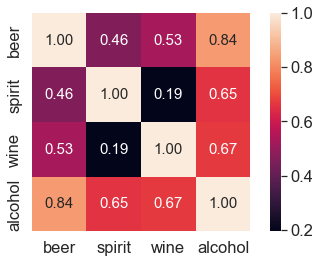

In [11]:
#히트맵 그리기 -> 색이 밝을수록 연관도가 높다
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

## 상관관계를 산점도 그래프로 시각화하기
### seaborn
• Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 모듈
### set()
• seaborn 사용 시 기존 matplotlib에서 사용되던 기본 스타일은 사용할 수 없음. set() 함수를 이용해서 seaborn 기본 스타일로 변경
### pairplot()
• 대각선 방향으로는 히스토그램으로 표시
### style
* 배경 및 그리드 색상
* 종류 : white, dark, whitegrid, darkgrid
### context
* 축에서 사용되는 레이블의 크기
* 종류 : paper, notebook, talk, poster

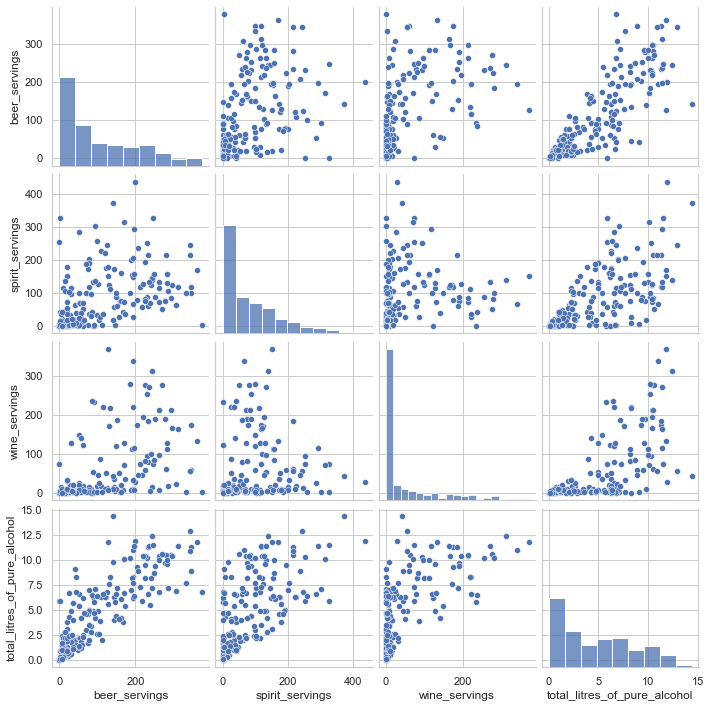

In [12]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

## 결측 데이터 전처리하기
### isna()
• 결측값 여부 확인

In [14]:
print(len(drinks[drinks['continent'].isna()]))
#.isna 함수는 not available의 값을 가져옴

23


### fillna()
• 결측값을 다음 인자로 오는 값으로 대체

In [15]:
drinks['continent']=drinks['continent'].fillna('OT')
#.fillna 함수는 결측값을 인자로 오는 값으로 대체한다.
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


## 파이차트로 시각화하기
• 파이차트는 시계 반대 방향으로 그림
### explode
• 파이의 중심부로부터의 거리
### autopct
* 각 파이에 표시될 문자의 형식
* % 변환 문자열에 사용
* %0.f 소수점 자릿수
* %% ‘%’를 표시

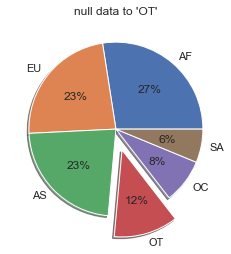

In [16]:
labels =  drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0) #조각을 밖으로 0.25만큼 빼라

plt.pie(fracs1, explode = explode, labels=labels, autopct="%0.f%%", shadow=True)
plt.title('null data to \'OT\'')
plt.show()

## 대륙별 spirit_servings 통계 분석하기
### agg()
* 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러 가지 연산 결과를 동시에 얻을 수 있음
* 대륙별 spirit_servings의 통계적 정보를 구하기 위해 agg()에 [‘mean’, ’min, ’max’, ’sum’] 파라미터를 준다

In [17]:
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum','std'])
result.head()

,mean,min,max,sum,std
continent,,,,,
AF,16.339623,0,152,866,28.102794
AS,60.840909,0,326,2677,84.362160
EU,132.555556,0,373,5965,77.589115
OC,58.437500,0,254,935,70.504817
OT,165.739130,68,438,3812,94.993884


In [ ]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean>= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


## 평균 beer_servings가 가장 높은 대륙은 어디일까?
### idxmax()
• 시리즈 객체에서 값이 가장 큰 ixdex를 반환

In [18]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
# wine_continent = drinks.groupby('continent').wine_servings.mean().idxmax()
print(beer_continent)
# print(wine_continent)

EU


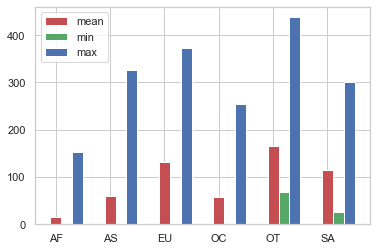

In [19]:
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.2

rects1 = plt.bar(index, means, bar_width, color = 'r', label='mean')
rects2 = plt.bar(index+bar_width, mins, bar_width, color = 'g', label='min')
rects3 = plt.bar(index+bar_width*2, maxs, bar_width, color = 'b', label='max')
# rects4 = plt.bar(index+bar_width*3, sums, bar_width, color = 'y', label='sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

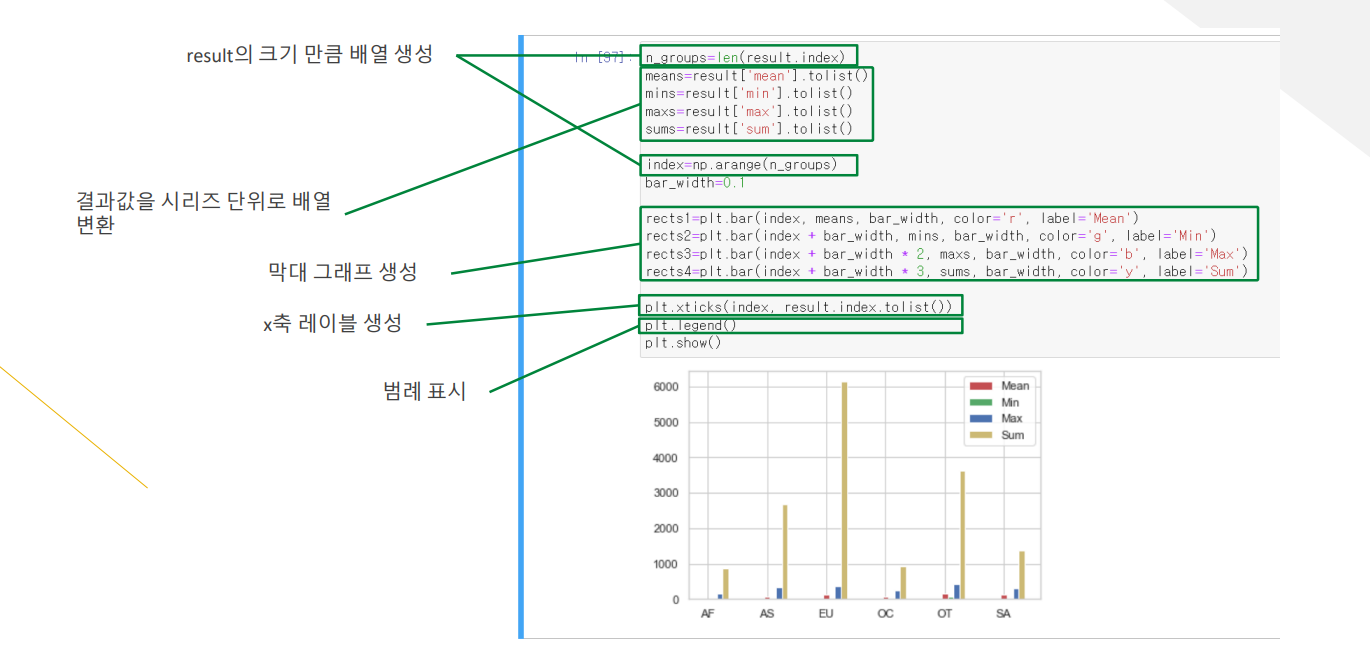

In [20]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0.,6], [total_mean, total_mean], "k--") # "k--"일때는 선이 "-------"으로 나옴
plt.xticks(x_pos, continents)

plt.show()

NameError: name 'continent_mean' is not defined

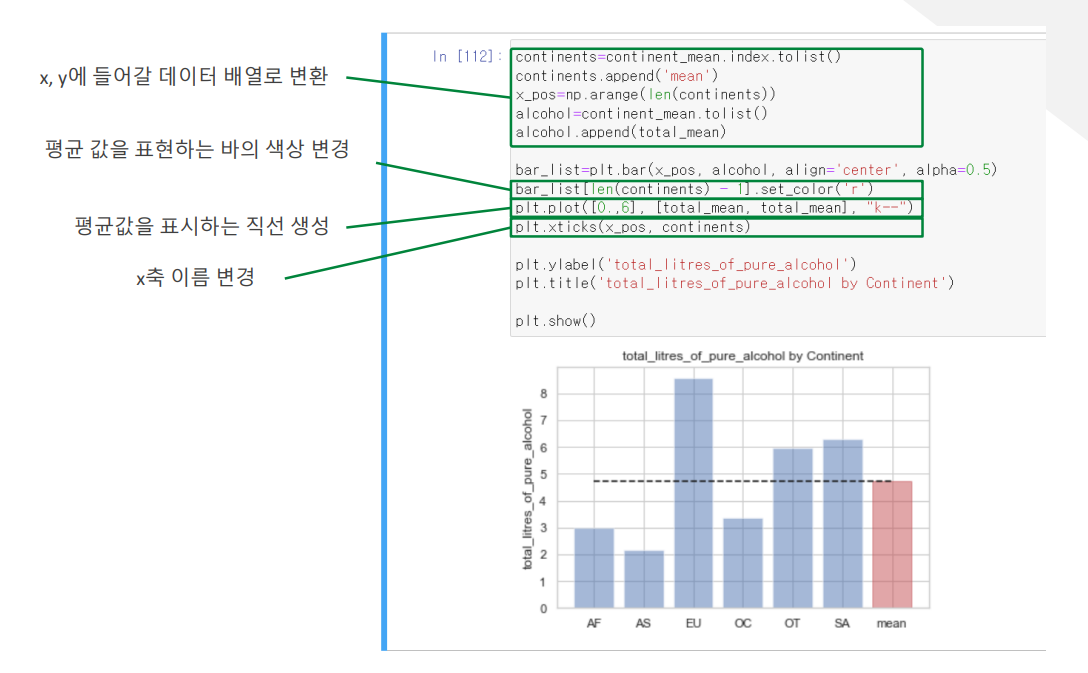

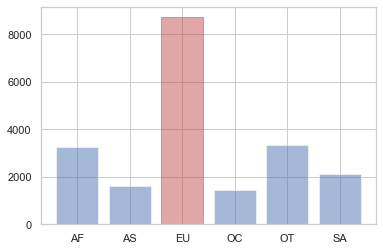

In [21]:
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
x_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(x_pos, continents)

plt.show()

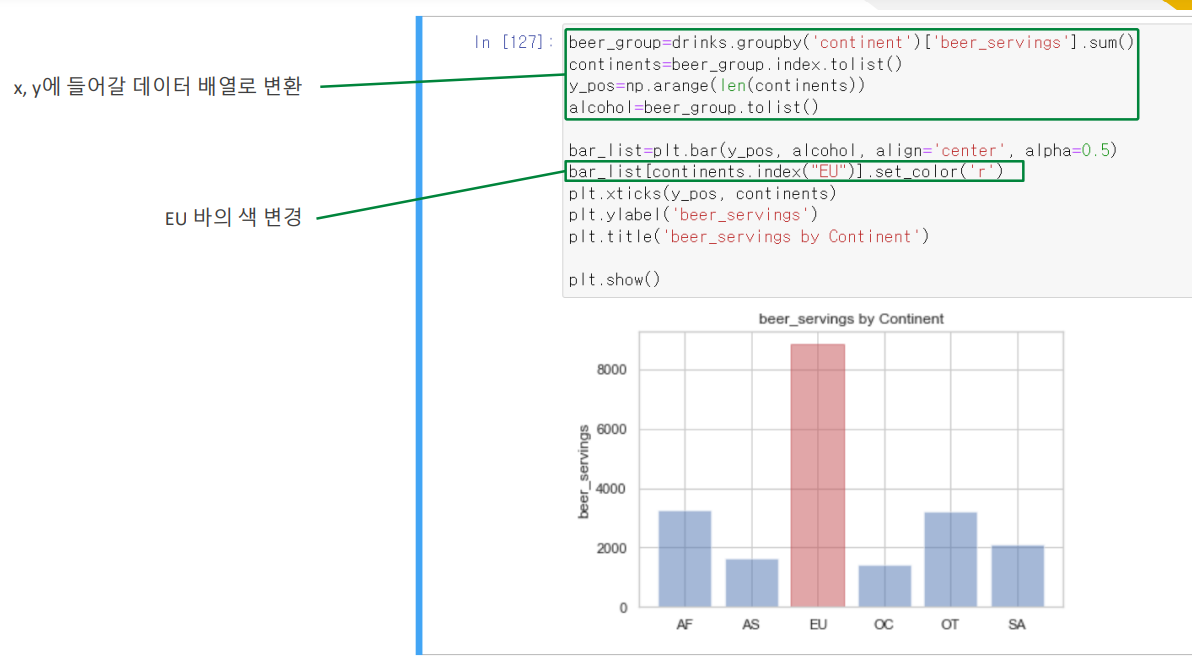

In [32]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
# print(drinks['total_servings'])
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
# print(drinks['alcohol_rate'])
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
# print(drinks['alcohol_rate'])

country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'],ascending=False)
country_with_rank.head(10)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


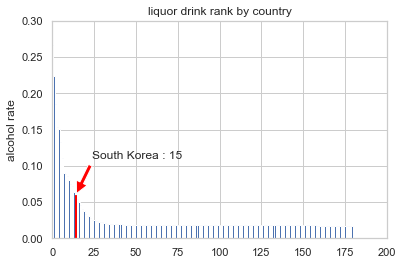

In [42]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('red')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])
korea_rank = country_list.index('South Korea')
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]

plt.annotate('South Korea : '+ str(korea_rank+1), xy=(korea_rank, korea_alc_rate), xytext=(korea_rank + 10, korea_alc_rate + 0.05),arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.show()
